## Predicting Vilnius Housing Prices

- The goal of this project is to analyse and predict housing prices in Vilnius.

- The dataset was scraped from a Lithuanian real estate website (Aruodas) from 2025/11/03 to 2025/11/04. The dataset describes housing units listed on the website and includes attributes such as eldership and street in which the housing unit is located, housing price, floor space, distance to points of interest (bus stops/shops/train station/cathedral), etc.

### Libraries

In [1]:
import pandas as pd
import numpy as np
import regex as re

import spacy

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Import dataset

In [2]:
objects = pd.read_csv('objects.csv')

## Dataset overview

In [3]:
objects

,city,eldership,street,object_name,total_views,views_today,likes,price,price_sq,house_number,...,distance_shop,crimes,no2,kd10,time_cathedral,time_train_station,distance_cathedral,distance_train_station,description,contact
0,Vilnius,Verkiai,Verkių g.,4 kambarių butas,14967,73,54.0,555000,3881,68,...,580.0,NaN,NaN,NaN,24.5,30.5,6.6,9.0,"Ypatingas butas Verkiuose, Vilniuje.\n\nParduo...",+37065776060
1,Vilnius,Markučiai,Subačiaus g.,1 kambario butas,10790,58,55.0,37200,2325,120,...,80.0,NaN,NaN,NaN,11.5,9.5,3.4,3.0,Parduodamas vieno kambario butas (bloke) su be...,+370 606 22194
2,Vilnius,Naujininkai,Pelesos g.,1 kambario butas,7430,135,25.0,9988,188,37,...,300.0,14.0,123.0,23.33,14.0,5.5,3.8,1.4,VILNIAUS MIESTO SAVIVALDYBĖ VIEŠO AUKCIONO BŪD...,+370 521 12711
3,Vilnius,Senamiestis,Bokšto g.,3 kambarių butas,21152,75,208.0,350000,4487,NaN,...,240.0,4.0,NaN,NaN,6.0,9.5,1.3,2.2,"PARDUODAMAS 3 kambarių, 78 m² butas Vilniaus S...",+370 612 40254
4,Vilnius,Naujoji Vilnia,Pramonės g.,1 kambario poilsio patalpa,23620,63,108.0,41900,1496,107,...,780.0,1.0,NaN,NaN,23.5,21.0,11.4,10.8,Parduodamas studijos tipo būstas Pramonės g. 1...,+37065571147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,Vilnius,Vilkpėdė,Eigulių g.,4 kambarių butas,327,0,53.0,340000,3463,5,...,500.0,1.0,NaN,NaN,22.5,17.5,7.0,4.8,BUTAI JAU PASTATYTI !\nPagrindinės pirkimo – p...,NaN
2951,Vilnius,Vilkpėdė,Eigulių g.,3 kambarių butas,346,0,8.0,370000,4792,5,...,500.0,1.0,NaN,NaN,22.5,17.5,7.0,4.8,BUTAI JAU PASTATYTI !\nPagrindinės pirkimo – p...,NaN
2952,Vilnius,Vilkpėdė,Eigulių g.,4 kambarių butas,227,0,6.0,396200,4851,NaN,...,390.0,3.0,NaN,NaN,21.0,16.5,6.8,4.7,REVINGIO kvartalas įsikūręs kaimynystėje su Vi...,NaN
2953,Vilnius,Vilkpėdė,Eigulių g.,4 kambarių butas,255,0,16.0,582200,5213,NaN,...,440.0,1.0,NaN,NaN,22.0,18.5,6.9,4.4,REVINGIO kvartalas įsikūręs kaimynystėje su Vi...,NaN


In [4]:
objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    2955 non-null   object 
 1   eldership               2955 non-null   object 
 2   street                  2955 non-null   object 
 3   object_name             2955 non-null   object 
 4   total_views             2955 non-null   int64  
 5   views_today             2955 non-null   int64  
 6   likes                   2926 non-null   float64
 7   price                   2955 non-null   int64  
 8   price_sq                2955 non-null   int64  
 9   house_number            2125 non-null   object 
 10  flat_number             446 non-null    object 
 11  area                    2955 non-null   float64
 12  rooms                   2955 non-null   int64  
 13  floor                   2955 non-null   int64  
 14  total_floors            2955 non-null   

### City

In [5]:
objects['city'].unique()

array(['Vilnius'], dtype=object)

All housing units in the dataset are located in Vilnius.

### Eldership

In [6]:
objects['eldership'].value_counts()

eldership
Naujamiestis          383
Senamiestis           359
Šnipiškės             185
Pašilaičiai           156
Žirmūnai              155
Antakalnis            150
Pilaitė               135
Justiniškės           130
Žvėrynas              114
Naujininkai            93
Naujoji Vilnia         88
Baltupiai              83
Lazdynai               82
Fabijoniškės           79
Viršuliškės            77
Vilkpėdė               70
Markučiai              61
Šeškinė                55
Karoliniškės           55
Užupis                 48
Bajorai                43
Visoriai               36
Lazdynėliai            34
Burbiškės              33
Jeruzalė               29
Santariškės            26
Šiaurės miestelis      26
Paupys                 25
Valakampiai            20
Grigiškės              15
Rasos                  15
Salininkai             14
Žemieji Paneriai       11
Tarandė                10
Dvarčionys              8
Verkiai                 8
Paneriai                6
Pavilnys                6
Ba

In [7]:
objects['eldership'].unique()

array([' Verkiai', ' Markučiai', ' Naujininkai', ' Senamiestis',
       ' Naujoji Vilnia', ' Šnipiškės', ' Žvėrynas', ' Rasos',
       ' Antakalnis', ' Fabijoniškės', ' Naujamiestis', ' Pilaitė',
       ' Žirmūnai', ' Viršuliškės', ' Kalnėnai', ' Užupis',
       ' Pašilaičiai', ' Jeruzalė', ' Justiniškės', ' Vilkpėdė',
       ' Grigiškės', ' Žemieji Paneriai', ' Baltupiai', ' Valakampiai',
       ' Galgiai', ' Balsiai', ' Lazdynėliai', ' Šeškinė', ' Burbiškės',
       ' Santariškės', ' Filaretai', ' Šiaurės miestelis', ' Dvarčionys',
       ' Paupys', ' Tarandė', ' Bajorai', ' Trakų Vokė', ' Lazdynai',
       ' Paneriai', ' Aukštieji Paneriai', ' Karoliniškės', ' Salininkai',
       ' Visoriai', ' Liepkalnis', ' Antavilis', ' Bukčiai',
       ' Saulėtekis', ' Kirtimai', ' Pavilnys', ' Kairėnai'], dtype=object)

Eldership names have unnecessary whitespace at the beginning and end. Let's remove it.

In [8]:
objects['eldership'] = objects['eldership'].str.strip()

/var/folders/l1/t93y2fns7r99qn6s0phqmdr80000gn/T/ipykernel_84965/656907860.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')


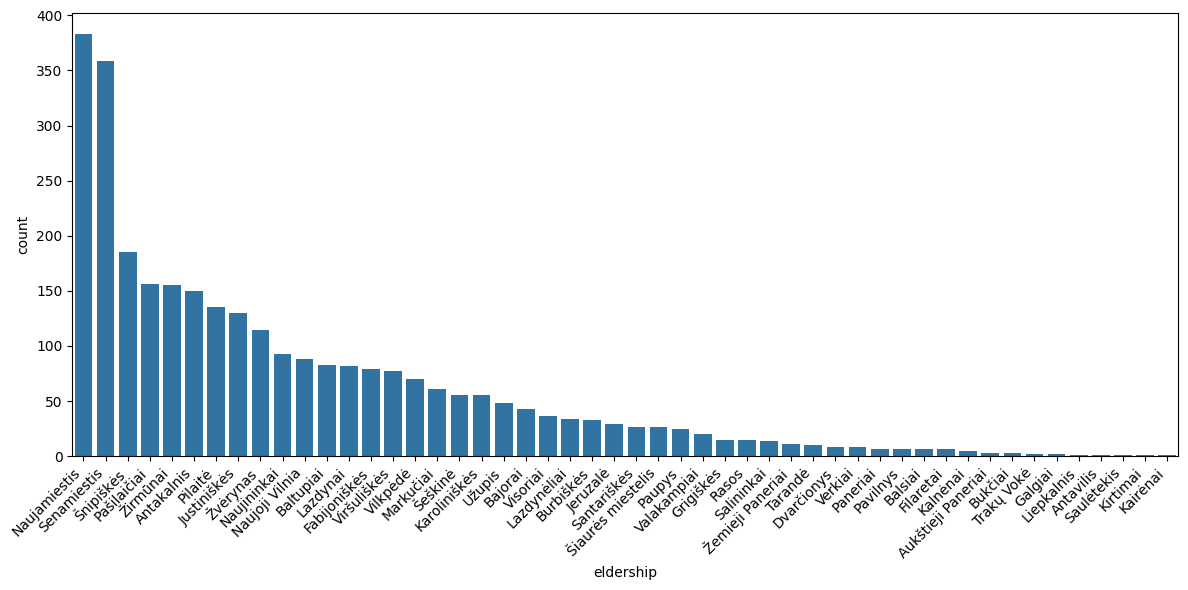

In [9]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

sns.countplot(data=objects, x='eldership', order=objects['eldership'].value_counts().index)

ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Most housing units on sale in Vilnius are located in Naujamiestis and Senamiestis (the Old Town). These elderships are located at the heart of Vilnius and therefore have the most interest from buyers and real estate developers. Least popular elderships are on the outskirts of Vilnius (in Vilnius district).

<Axes: xlabel='price', ylabel='eldership'>

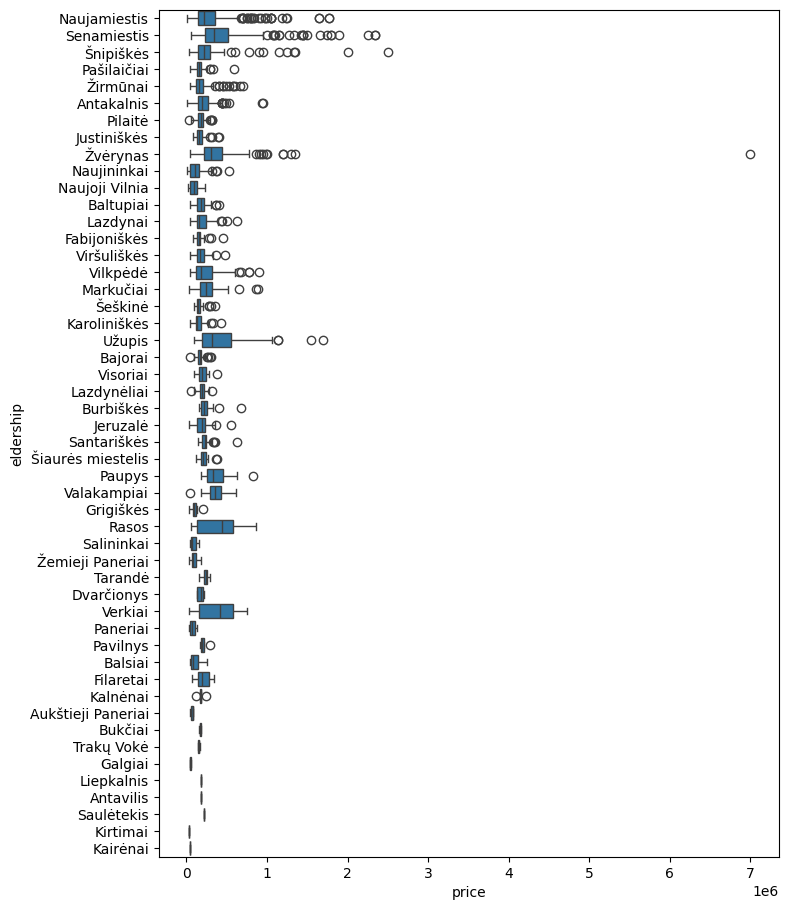

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8,11))

sns.boxplot(data=objects, x="price", y="eldership", order=objects['eldership'].value_counts().index)

The elderships that are regarded as more expensive such as Naujamiestis, Senamiestis, Užupis and Žvėrynas tend to have more outliers as some apartments built there cater to the extremely wealthy.

### Street

In [11]:
objects['street'].value_counts()

street
Kalvarijų g.                    74
Algirdo g.                      51
Žirmūnų g.                      46
Justiniškių g.                  41
Rygos g.                        41
                                ..
O. Milašiaus g.                  1
Pranciškaus Smuglevičiaus g.     1
Maumedžių g.                     1
Vyšnių g.                        1
J. Treinio g.                    1
Name: count, Length: 497, dtype: int64

In [12]:
objects['street'].unique()[:3]

array([' Verkių g.', ' Subačiaus g.', ' Pelesos g.'], dtype=object)

Whitespace should be stripped once again.

In [13]:
objects['street'] = objects['street'].str.strip()

/var/folders/l1/t93y2fns7r99qn6s0phqmdr80000gn/T/ipykernel_84965/4103147589.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')


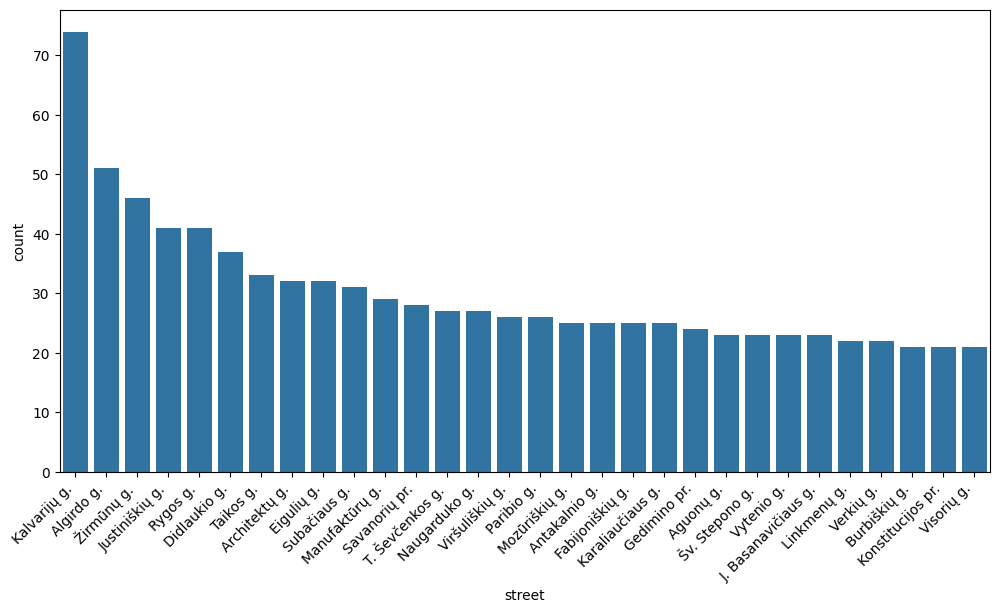

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

sns.countplot(data=objects, x='street', order=objects['street'].value_counts().iloc[:30].index)

ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

Kalvarijų street is the street with the most housing units on sale. New units have been quickly sprawling up since it is to the north of the Old Town and allows for easy access to the business center of Vilnius. Other streets such as Algirdo, T. Ševčenkos and Naugarduko streets are also developing as many tech companies such as Nord Security, Oxylabs, Vinted and others have their offices there. Streets such as Justiniškių, Rygos and Architektų are in residencial areas made up of apartment buildings and have also seen more new builds.

### Total Views

<Axes: xlabel='total_views', ylabel='Count'>

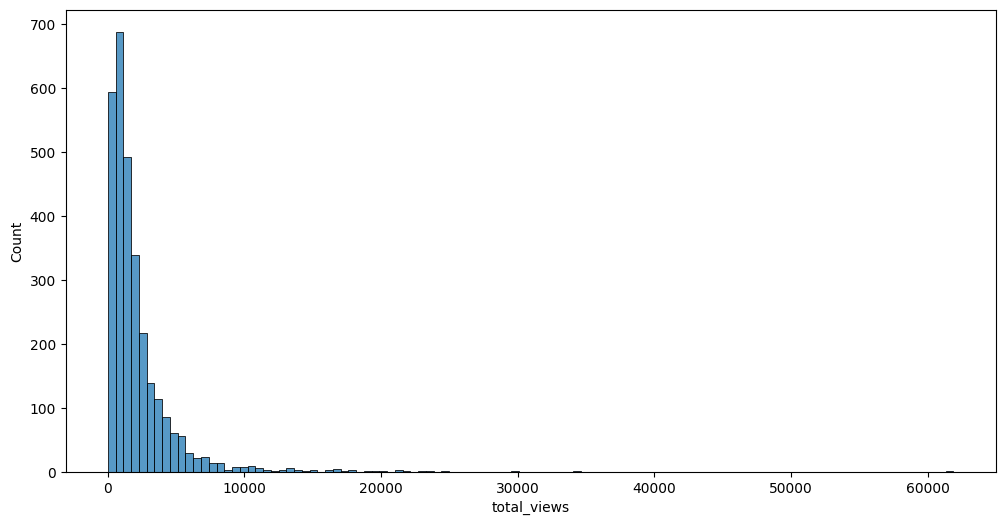

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

sns.histplot(data=objects, x='total_views')

In [16]:
(objects['total_views'] < 10000).sum() / len(objects['total_views'])

np.float64(0.9800338409475465)

98 % of the successfuly scraped posts have more than 10000 views. Posts that have more than 10000 views are older.

### Views Today

<Axes: xlabel='views_today', ylabel='Count'>

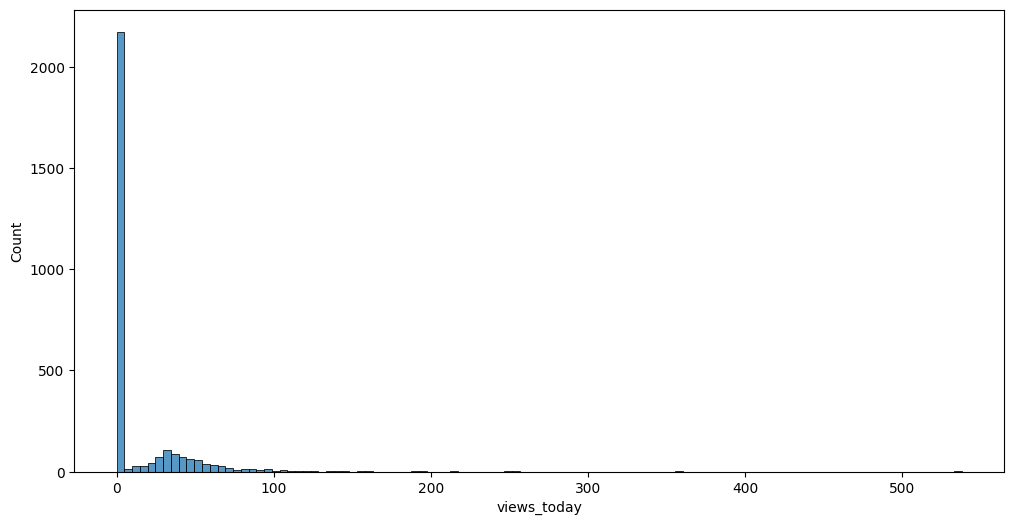

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

sns.histplot(data=objects, x='views_today')

Views today are dependant on the time of scraping. As the dataset was scraped at midnight, practically no views were observed. This variable is not very useful.

### Likes

<Axes: xlabel='likes', ylabel='Count'>

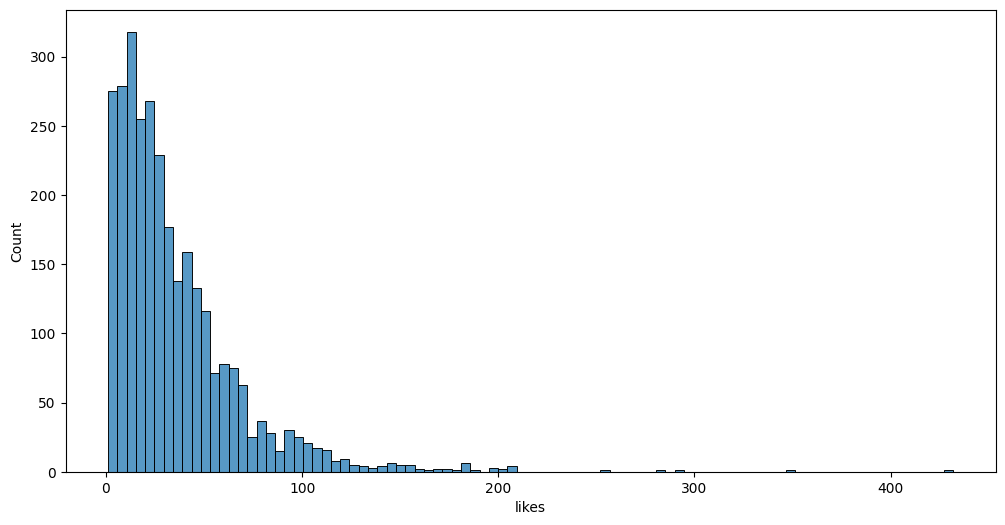

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

sns.histplot(data=objects, x='likes')

In [19]:
(objects['likes'] < 10000).sum() / len(objects['likes'])

np.float64(0.990186125211506)

99 % of posts have less than 100 likes. Likes are commonly used by users that are interested in the housing unit or are looking to purchase on in the future.

### Price

<Axes: xlabel='price', ylabel='Count'>

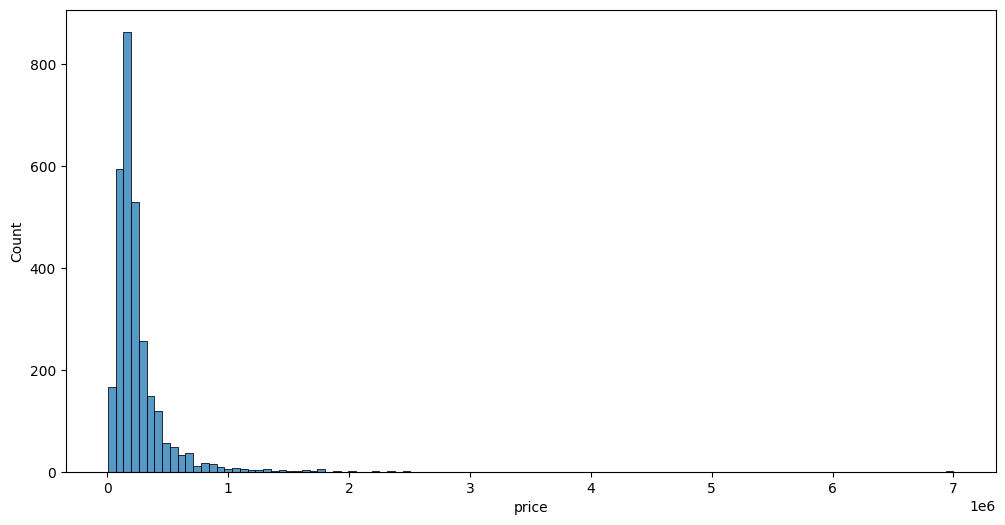

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

sns.histplot(data=objects, x='price')

In [21]:
(objects['price'] < 250000).sum() / len(objects['price'])

np.float64(0.7055837563451777)

70.56 % of listings have a price of 250000 euros or less. This is not suprising as the average wage in Lithuanian in 2024 was 1407 euros. The housing market has also been growing over the past 5 years as have wages.

In [22]:
objects[objects['price'] == max(objects['price'])]

,city,eldership,street,object_name,total_views,views_today,likes,price,price_sq,house_number,...,distance_shop,crimes,no2,kd10,time_cathedral,time_train_station,distance_cathedral,distance_train_station,description,contact
31,Vilnius,Žvėrynas,Vytauto g.,3 kambarių butas,19636,50,23.0,7000000,5307,NaN,...,280.0,2.0,NaN,NaN,14.5,14.0,3.4,3.6,The EXCLUSIVE building – MANSION (1319.41 sq. ...,+370 650 57965


The most expensive housing unit on the market is valued at 7 million euros. It is a 3 bedroom apartment located in Žvėrynas, one of the most expensive elderships in Vilnius in terms of housing prices.

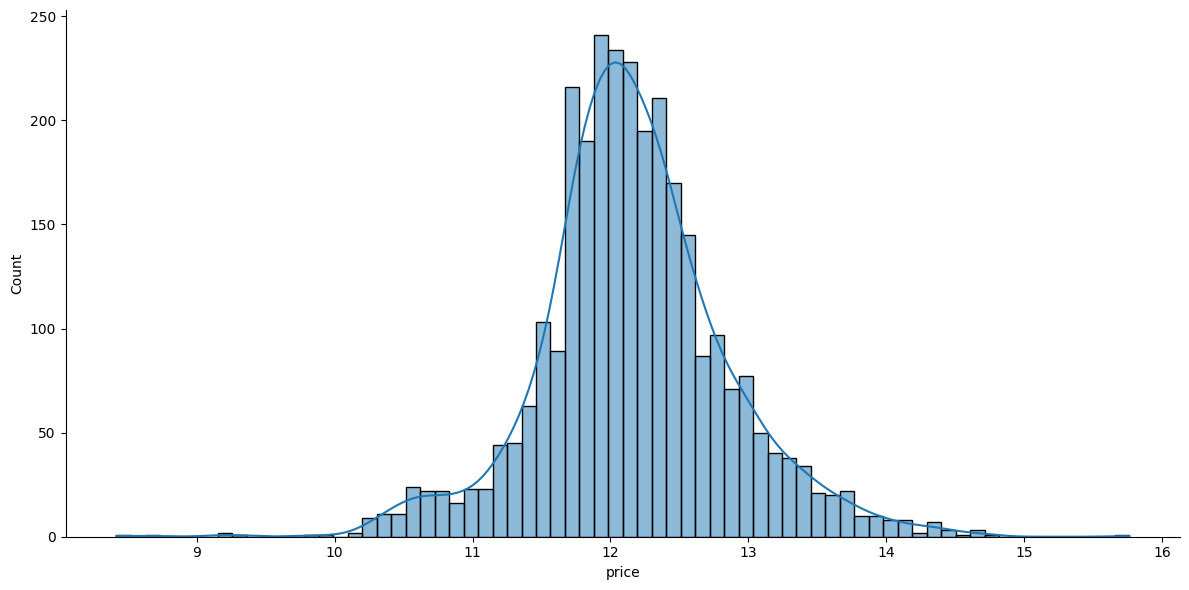

In [23]:
sns.displot(data=objects,
            x=np.log(objects['price']),
            kde=True,
            height=6, aspect=2)

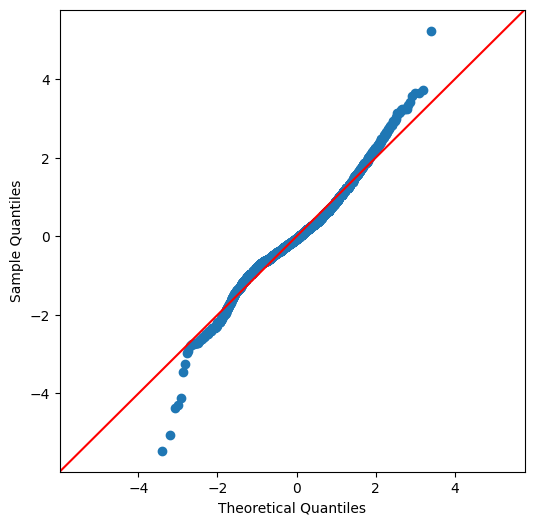

In [24]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

sm.qqplot(np.log(objects['price']), fit=True, line='45', ax=ax)

plt.show()

The distribution of price in nowhere near normal and, even after transformations, will be heavily asymetric. Prediction with linear models is out of the question.

### Price (sq ft)

<Axes: xlabel='price_sq', ylabel='Count'>

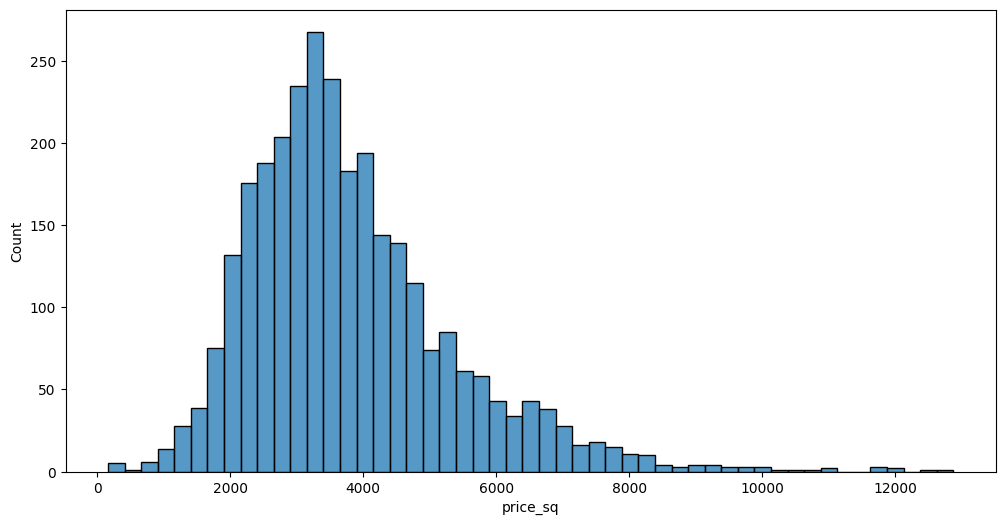

In [25]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

sns.histplot(data=objects, x='price_sq')

Price per square feet may look more normal after a tranformation.

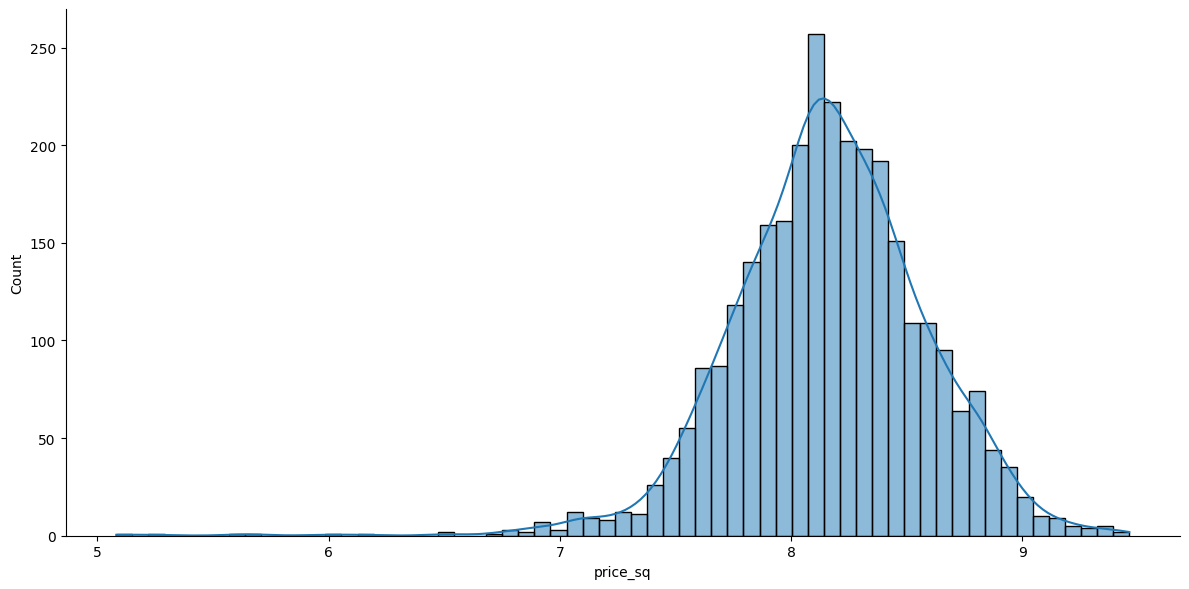

In [26]:
sns.displot(data=objects,
            x=np.log(objects['price_sq']),
            kde=True,
            height=6, aspect=2)

The distribution is left-skewed even after applying a log transformation to the data. This further confirms that a linear model shouldn't be used.

### House (building) and flat number

In [27]:
objects['house_number'].value_counts()

house_number
3      92
5      88
7      80
12     69
8      67
       ..
65A     1
19A     1
4C      1
79      1
41D     1
Name: count, Length: 275, dtype: int64

In [28]:
objects['flat_number'].value_counts()

flat_number
2         17
1         15
6         14
5         11
3         10
          ..
A3-4-4     1
A3-5-7     1
A2-6-4     1
A1-6-4     1
E3-04      1
Name: count, Length: 267, dtype: int64

We won't be able to use the building or flat number to predict the price, yet, it is interesting that flat numbers with low values are the most common in the dataset. We could make a guess and say that these apartments are less desirable as they are on the first floor. There are also a lot of missing values as some posts did not provide a value.

### Area

<Axes: xlabel='area', ylabel='Count'>

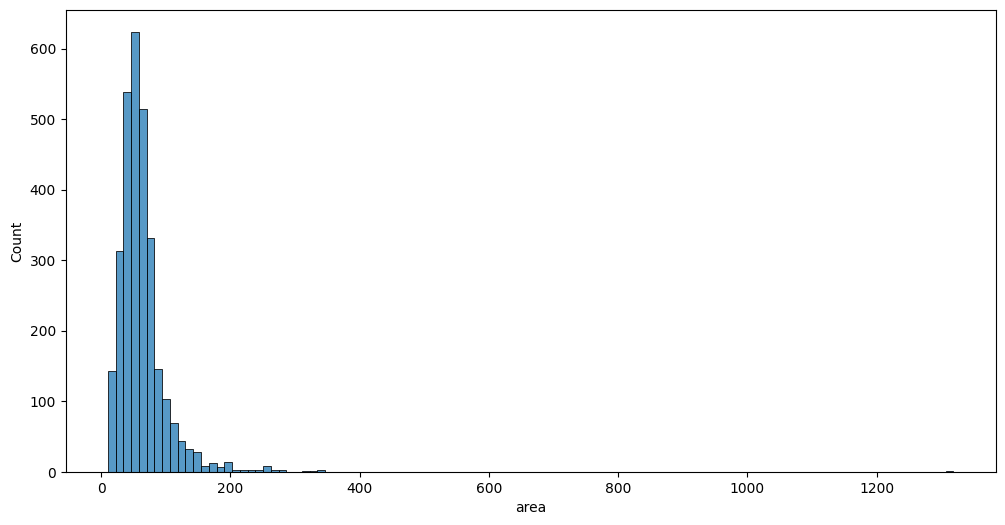

In [29]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

sns.histplot(data=objects, x='area')

The distibution of area (housing unit size) closely resembles the distribution of housing unit price. This is not surprising as the bigger the house, the more expensive it is.

### Rooms

In [30]:
objects['rooms'].value_counts()

rooms
2    1127
3     931
1     463
4     329
5      75
6      24
7       4
8       2
Name: count, dtype: int64

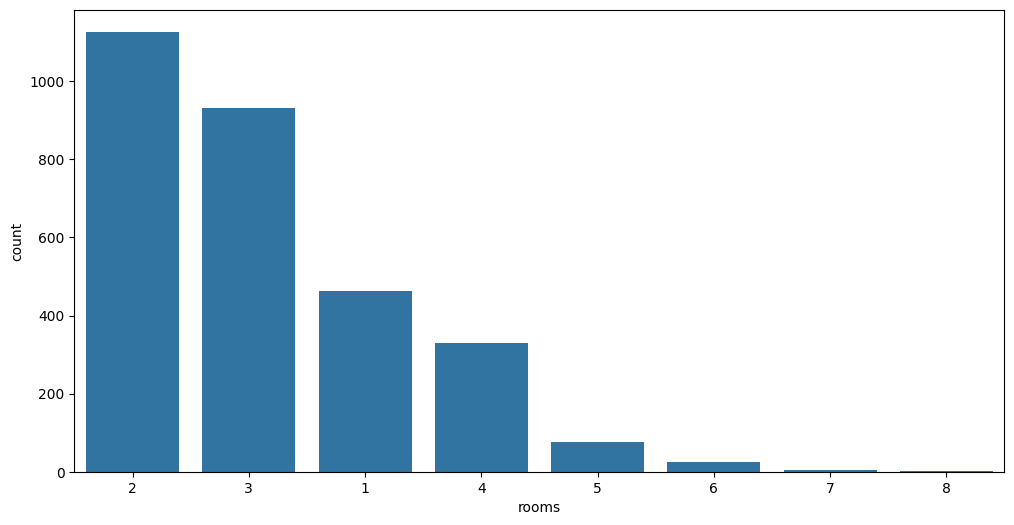

In [31]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

sns.countplot(data=objects, x='rooms', order=objects['rooms'].value_counts().index)

plt.show()

Most housing units on the market have 2 or 3 rooms. After that there is a large drop-off: units with 1 and 4 are around twice as unpopular as units with 2 or 3 rooms. From 2 to 3 rooms is the market standart, they are usually meant for couples or families. Single room units usually house singles and young couples and units with 4 or more rooms are rarer as they cost more.

### Floor

In [32]:
objects['floor'].value_counts()

floor
2     690
1     642
3     511
4     428
5     299
6     111
7      76
9      55
8      47
0      21
11     14
10     10
12     10
13      9
16      7
19      5
14      4
18      3
25      2
17      2
23      1
26      1
15      1
22      1
28      1
24      1
29      1
21      1
20      1
Name: count, dtype: int64

Most units on sale are located on 1 of the first 3 floors. There is a drop off after the 5th floor. To see the bigger picture, we should look at the total number of floors.

### Total floors

In [33]:
objects['total_floors'].value_counts()

total_floors
5      821
4      552
3      417
9      329
6      232
2      169
7      141
12      72
8       56
1       42
11      23
10      17
13      16
16      15
18      12
20      11
27      11
23       5
29       4
14       4
17       2
500      1
21       1
19       1
24       1
Name: count, dtype: int64

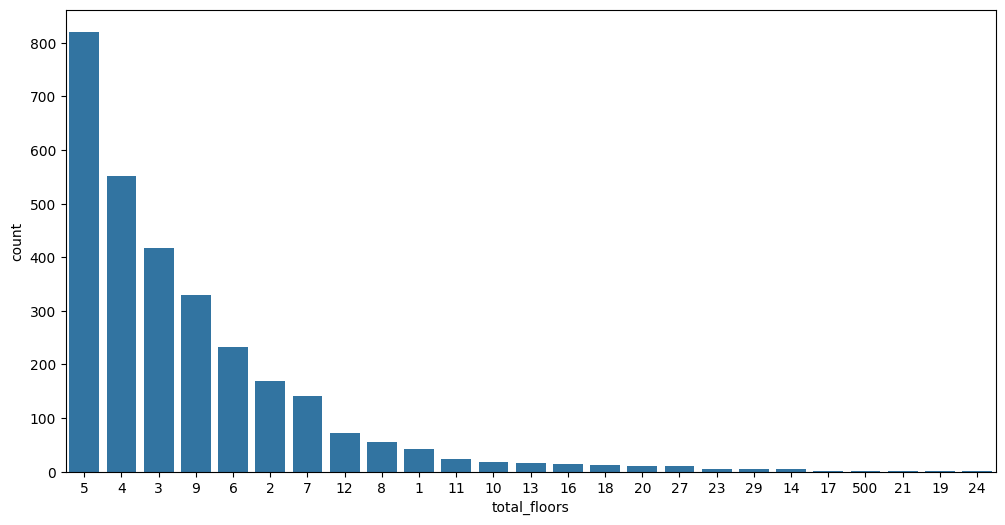

In [34]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

sns.countplot(data=objects, x='total_floors', order=objects['total_floors'].value_counts().index)

plt.show()

The distribution of total floors show that most building have up to 6 floors in total. There is one outlier of '500'.

In [35]:
objects[objects['total_floors'] == 500]

,city,eldership,street,object_name,total_views,views_today,likes,price,price_sq,house_number,...,distance_shop,crimes,no2,kd10,time_cathedral,time_train_station,distance_cathedral,distance_train_station,description,contact
274,Vilnius,Pilaitė,Karaliaučiaus g.,4 kambarių butas,861,33,NaN,249000,3221,NaN,...,430.0,1.0,NaN,NaN,35.0,34.5,9.3,12.5,NaN,+370 666 48155


A quick look in Google Maps shows us that there is a total of 5 floors.

In [36]:
objects.loc[274, 'total_floors'] = 5

### Year

In [37]:
objects['year'].value_counts()

year
2025                             386
1940                             214
2024                             148
2026                             120
2023                             116
                                ... 
1966 statyba, 2020 renovacija      1
1981 statyba, 2017 renovacija      1
1900 statyba, 1961 renovacija      1
1940 statyba, 1999 renovacija      1
1978 statyba, 2018 renovacija      1
Name: count, Length: 267, dtype: int64

Most buildings are new builds (built in the past few years), will be built next year or are in Senamiestis (1940 and earlier). Some values also have two numbers inside them: the first one is the original year of construction and the second one is year of renovation. Let's plit this column.

In [38]:
years = pd.DataFrame([re.findall(r'\d{4}', year) for year in objects['year']], columns=['year_build', 'year_renovation'])

In [39]:
objects = pd.concat([objects, years], axis=1)

### Object and building type

In [40]:
objects['object_type'].value_counts()

object_type
Patalpa, viešbučių paskirtis    14
Patalpa, poilsio paskirtis       5
Buto dalis                       4
Name: count, dtype: int64

Entries that have a building type are a special type of housing unit: unit with hotel purpose (14), unit with leasure purpose (5), a part of an apartment (4).

In [41]:
objects['building_type'].value_counts()

building_type
Mūrinis        2100
Blokinis        544
Monolitinis     238
Kita             34
Medinis          31
Rąstinis          5
Karkasinis        2
Skydinis          1
Name: count, dtype: int64

Most housing units were constructed out of brick and morter (mūrinis), pre-manufactured blocks, common to the Soviet period (blokinis), large unified blocks (monolitinis).

### Heating

In [42]:
objects['heating'].value_counts()

heating
Centrinis kolektorinis                                       1293
Centrinis                                                     954
Dujinis                                                       309
Elektra                                                        83
Aeroterminis                                                   81
Kietu kuru                                                     35
Kita                                                           30
Geoterminis                                                    29
Centrinis, elektra                                             18
Elektra, aeroterminis                                          17
Centrinis, centrinis kolektorinis                              12
Elektra, centrinis kolektorinis                                11
Centrinis kolektorinis, dujinis                                11
Centrinis, dujinis                                              8
Elektra, kietu kuru                                             8
El

Some housing units have multiple ways of heating but the most popular are collectively heating the whole apartament building.

### Furnishing

In [43]:
objects['furnishing'].value_counts()

furnishing
Įrengtas             2210
Dalinė apdaila        648
Kita                   56
Neįrengtas             40
Nebaigtas statyti       1
Name: count, dtype: int64

Most housing units are fully furnished.

### Energy Class

In [44]:
objects['energy_class'].value_counts()

energy_class
A++    294
A+     194
B       93
A       58
C       17
G       14
E        2
D        1
Name: count, dtype: int64

Mostly only new builds have an energy class of A+ or higher. The majority of the posts do not provide an energy class.

### Window direction

In [45]:
objects['window_direction'].value_counts()

window_direction
Rytai                             242
Vakarai                           225
Vakarai, pietūs                   179
Pietūs, rytai                     173
Vakarai, rytai                    160
Pietūs                            156
Šiaurė, pietūs                    102
Šiaurė, rytai                      69
Šiaurė, vakarai                    61
Vakarai, pietūs, rytai             61
Šiaurė, vakarai, pietūs, rytai     39
Šiaurė, vakarai, pietūs            31
Šiaurė, vakarai, rytai             27
Šiaurė                             26
Šiaurė, pietūs, rytai              18
Rytai, vakarai                      3
Pietūs, vakarai                     2
Name: count, dtype: int64

Top 3 housing unit categories by window direction face the east, west or both.

### Qualities

In [46]:
objects['qualities'].value_counts()

qualities
Yra liftas                                                                                                                                                       254
Nauja kanalizacija Nauja elektros instaliacija Virtuvė sujungta su kambariu                                                                                       66
Virtuvė sujungta su kambariu                                                                                                                                      61
Tualetas ir vonia atskirai                                                                                                                                        50
Nauja kanalizacija Nauja elektros instaliacija                                                                                                                    41
                                                                                                                                                                ... 


This column describes additional attributes that the housing unit might have such as new electrical wiring, separate bathroom and toilet areas and so on. The qualities need to be made into dummy variables or vectorized as they do not provide any value in their current from.

In [47]:
objects.loc[1521, 'qualities'] = 'Varžytynės/aukcionas Aukštos lubos Tualetas ir vonia atskirai Nauja kanalizacija Nauja elektros instaliacija'

In [48]:
qualities = re.findall('[A-Z][^A-Z]*', objects['qualities'].str.cat())

qualities = [quality.strip() for quality in qualities]

qualities = set(qualities)

print(qualities)

{'Yra liftas', 'Uždaras kiemas', 'Butas palėpėje', 'Internetas', 'Nauja elektros instaliacija', 'Butas per kelis aukštus', 'Nauja kanalizacija', 'Atskiras įėjimas', 'Kabelinė televizija', 'Varžytynės/aukcionas', 'Tualetas ir vonia atskirai', 'Renovuotas namas', 'Virtuvė sujungta su kambariu', 'Aukštos lubos'}


In [49]:
# qualitiesMap = {'Uždaras kiemas':'Enclosed courtyard',
#                 'Nauja elektros instaliacija':'New electrical wiring',
#                 'Varžytynės/aukcionas':'Auction',
#                 'Tualetas ir vonia atskirai':'Separate toilet and bathroom',
#                 'Renovuotas namas':'Renovated house',
#                 'Virtuvė sujungta su kambariu':'Kitchen connected to the living room',
#                 'Aukštos lubos':'High ceilings',
#                 'Butas palėpėje':'Attic apartment',
#                 'Internetas':'Internet',
#                 'Yra liftas':'Elevator',
#                 'Butas per kelis aukštus':'Multi-level apartment',
#                 'Kabelinė televizija':'Cable TV',
#                 'Nauja kanalizacija':'New sewerage system',
#                 'Atskiras įėjimas':'Separate entrance'}

qualitiesMap = {'Uždaras kiemas':'enclosed_courtyard',
                'Nauja elektros instaliacija':'new_electrical_wiring',
                'Varžytynės/aukcionas':'on_auction',
                'Tualetas ir vonia atskirai':'separate_toilet_bathroom',
                'Renovuotas namas':'renovated',
                'Virtuvė sujungta su kambariu':'kitchen_connected_to_living_room',
                'Aukštos lubos':'high_ceilings',
                'Butas palėpėje':'attic_apartment',
                'Internetas':'internet',
                'Yra liftas':'elevator',
                'Butas per kelis aukštus':'multi_level_apartment',
                'Kabelinė televizija':'cable_tv',
                'Nauja kanalizacija':'new_sewerage_system',
                'Atskiras įėjimas':'separate_entrance'}

In [50]:
for quality in qualities:
    qualityEnglish = qualitiesMap[quality]
    objects[qualityEnglish] = objects["qualities"].astype(str).str.contains(quality, regex=False).astype(int)

In [51]:
objects

,city,eldership,street,object_name,total_views,views_today,likes,price,price_sq,house_number,...,new_electrical_wiring,multi_level_apartment,new_sewerage_system,separate_entrance,cable_tv,on_auction,separate_toilet_bathroom,renovated,kitchen_connected_to_living_room,high_ceilings
0,Vilnius,Verkiai,Verkių g.,4 kambarių butas,14967,73,54.0,555000,3881,68,...,1,0,1,0,1,0,0,0,1,0
1,Vilnius,Markučiai,Subačiaus g.,1 kambario butas,10790,58,55.0,37200,2325,120,...,0,0,0,0,0,0,0,0,1,0
2,Vilnius,Naujininkai,Pelesos g.,1 kambario butas,7430,135,25.0,9988,188,37,...,0,0,0,0,0,1,0,0,0,0
3,Vilnius,Senamiestis,Bokšto g.,3 kambarių butas,21152,75,208.0,350000,4487,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Vilnius,Naujoji Vilnia,Pramonės g.,1 kambario poilsio patalpa,23620,63,108.0,41900,1496,107,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,Vilnius,Vilkpėdė,Eigulių g.,4 kambarių butas,327,0,53.0,340000,3463,5,...,0,0,0,0,0,0,0,0,0,1
2951,Vilnius,Vilkpėdė,Eigulių g.,3 kambarių butas,346,0,8.0,370000,4792,5,...,1,0,1,0,0,0,0,0,1,1
2952,Vilnius,Vilkpėdė,Eigulių g.,4 kambarių butas,227,0,6.0,396200,4851,NaN,...,1,0,1,0,0,0,0,0,1,0
2953,Vilnius,Vilkpėdė,Eigulių g.,4 kambarių butas,255,0,16.0,582200,5213,NaN,...,0,0,0,0,0,0,0,0,0,0


### Facilities, equipment and security

In [52]:
objects['facilities'].value_counts()

facilities
Balkonas                                                   398
Balkonas Rūsys                                             127
Balkonas Vieta automobiliui                                120
Terasa                                                     115
Vieta automobiliui                                         106
                                                          ... 
Terasa Rūsys Vieta automobiliui                              1
Sandėliukas Yra palėpė Drabužinė                             1
Sandėliukas Vieta automobiliui Balkonas Drabužinė            1
Sandėliukas Vieta automobiliui Balkonas Drabužinė Rūsys      1
Sandėliukas Terasa Pirtis Vieta automobiliui                 1
Name: count, Length: 105, dtype: int64

In [53]:
facilities = re.findall('[A-Z][^A-Z]*', objects['facilities'].str.cat())

facilities = [facility.strip() for facility in facilities]

facilities = set(facilities)

print(facilities)

{'Rūsys', 'Yra palėpė', 'Drabužinė', 'Vieta automobiliui', 'Sandėliukas', 'Terasa', 'Balkonas', 'Pirtis'}


In [54]:
# facilitiesMap = {'Terasa':'Terrace',
#                  'Yra palėpė':'Attic',
#                  'Drabužinė':'Closet',
#                  'Pirtis':'Sauna',
#                  'Vieta automobiliui':'Parking space',
#                  'Rūsys':'Basement',
#                  'Balkonas':'Balcony',
#                  'Sandėliukas':'Storage room'}

facilitiesMap = {'Terasa':'terrace',
                 'Yra palėpė':'attic',
                 'Drabužinė':'closet',
                 'Pirtis':'sauna',
                 'Vieta automobiliui':'parking_space',
                 'Rūsys':'basement',
                 'Balkonas':'balcony',
                 'Sandėliukas':'storage_room'}

In [55]:
for f in facilities:
    facilityEnglish = facilitiesMap[f]
    objects[facilityEnglish] = objects['facilities'].astype(str).str.contains(f, regex=False).astype(int)

In [56]:
objects['equipment'].value_counts()

equipment
Šildomos grindys                                                                                               180
Skalbimo mašina Su baldais Šaldytuvas Virtuvės komplektas Viryklė Vonia                                         70
Šildomos grindys Rekuperacinė sistema                                                                           70
Skalbimo mašina Su baldais Šaldytuvas Virtuvės komplektas Viryklė Dušo kabina                                   46
Skalbimo mašina Su baldais Šaldytuvas Virtuvės komplektas Viryklė Plastikiniai vamzdžiai Vonia                  36
                                                                                                              ... 
Skalbimo mašina Su baldais Virtuvės komplektas Viryklė Indaplovė Vonia                                           1
Kondicionierius Skalbimo mašina Su baldais Šaldytuvas Virtuvės komplektas Viryklė Židinys Dušo kabina            1
Su baldais Šaldytuvas Virtuvės komplektas Viryklė Plastikiniai vamzdži

In [57]:
equipment = re.findall('[A-ZŠŽ][^A-ZŠŽ]*', objects['equipment'].str.cat())

equipment = [e.strip() for e in equipment]

equipment = set(equipment)

print(equipment)

{'Indaplovė', 'Židinys', 'Su baldais', 'Virtuvės komplektas', 'Dušo kabina', 'Rekuperacinė sistema', 'Šaldytuvas', 'Plastikiniai vamzdžiai', 'Vonia', 'Skalbimo mašina', 'Šildomos grindys', 'Viryklė', 'Kondicionierius'}


In [58]:
# equipmentMap = {'Skalbimo mašina':'Washing machine',
#                 'Šaldytuvas':'Refrigerator',
#                 'Šildomos grindys':'Heated floors',
#                 'Kondicionierius':'Air conditioner',
#                 'Su baldais':'With furniture',
#                 'Viryklė':'Stove',
#                 'Indaplovė':'Dishwasher',
#                 'Židinys':'Fireplace',
#                 'Vonia':'Bathtub',
#                 'Rekuperacinė sistema':'Recuperation system',
#                 'Dušo kabina':'Shower cabin',
#                 'Virtuvės komplektas':'Kitchen set',
#                 'Plastikiniai vamzdžiai':'Plastic pipes'}

equipmentMap = {'Skalbimo mašina':'washing_machine',
                'Šaldytuvas':'fridge',
                'Šildomos grindys':'heated_floors',
                'Kondicionierius':'air_conditioner',
                'Su baldais':'with_furniture',
                'Viryklė':'stove',
                'Indaplovė':'dishwasher',
                'Židinys':'fireplace',
                'Vonia':'bathtub',
                'Rekuperacinė sistema':'recuperation_system',
                'Dušo kabina':'shower_cabin',
                'Virtuvės komplektas':'kitchen_set',
                'Plastikiniai vamzdžiai':'plastic_pipes'}

In [59]:
for e in equipment:
    equipmentEnglish = equipmentMap[e]
    objects[equipmentEnglish] = objects['equipment'].astype(str).str.contains(e, regex=False).astype(int)

In [60]:
objects['security'].value_counts()

security
Šarvuotos durys Kodinė laiptinės spyna                                                 745
Šarvuotos durys Kodinė laiptinės spyna Vaizdo kameros                                  373
Šarvuotos durys                                                                        164
Kodinė laiptinės spyna                                                                 151
Šarvuotos durys Signalizacija Kodinė laiptinės spyna                                   125
Šarvuotos durys Signalizacija Kodinė laiptinės spyna Vaizdo kameros                     55
Kodinė laiptinės spyna Vaizdo kameros                                                   44
Šarvuotos durys Vaizdo kameros                                                          29
Šarvuotos durys Signalizacija                                                           28
Šarvuotos durys Kodinė laiptinės spyna Vaizdo kameros Budintis sargas                   19
Vaizdo kameros                                                                   

In [61]:
security = re.findall('[A-ZŠŽ][^A-ZŠŽ]*', objects['security'].str.cat())

security = [s.strip() for s in security]

security = set(security)

print(security)

{'Budintis sargas', 'Vaizdo kameros', 'Kodinė laiptinės spyna', 'Signalizacija', 'Šarvuotos durys'}


In [62]:
# securityMap = {'Signalizacija':'Alarm system',
#                'Budintis sargas':'Security guard',
#                'Šarvuotos durys':'Armored door',
#                'Kodinė laiptinės spyna':'Code-locked staircase door',
#                'Vaizdo kameros':'Video cameras'}

securityMap = {'Signalizacija':'alarm_system',
               'Budintis sargas':'security_guard',
               'Šarvuotos durys':'armored_door',
               'Kodinė laiptinės spyna':'code_locked_stairway',
               'Vaizdo kameros':'security_cameras'}

In [63]:
for s in security:
    securityEnglish = securityMap[s]
    objects[securityEnglish] = objects['security'].astype(str).str.contains(s, regex=False).astype(int)

### Distance & driving time to key objects

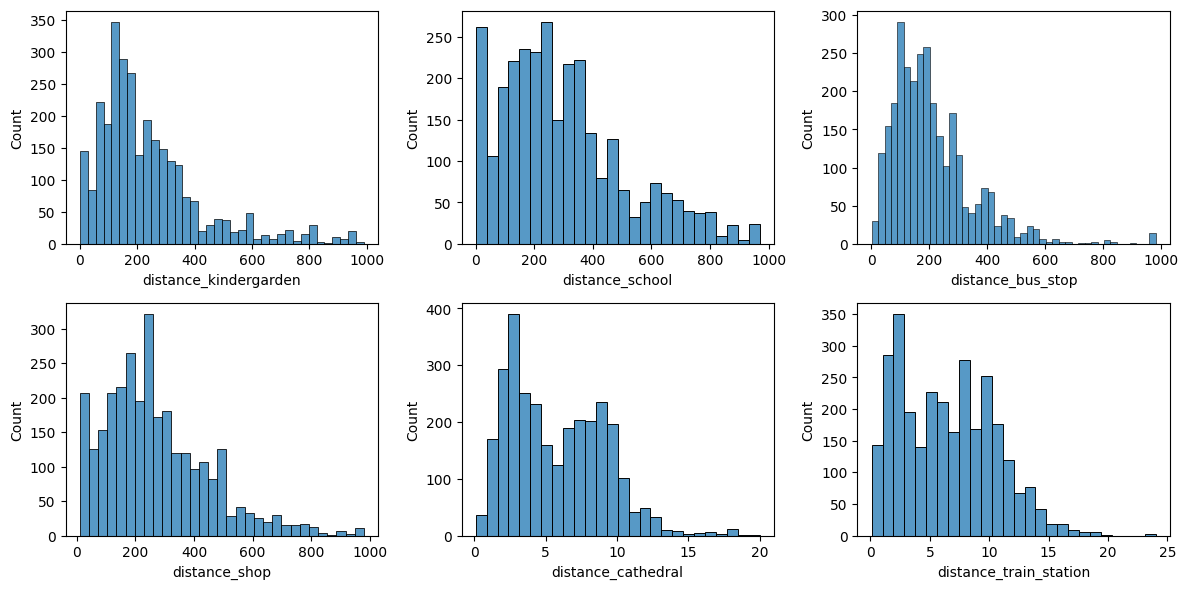

In [64]:
fig, axs = plt.subplots(2,3, figsize=(12,6))

sns.histplot(data=objects, x='distance_kindergarden', ax=axs[0, 0])
sns.histplot(data=objects, x='distance_school', ax=axs[0, 1])
sns.histplot(data=objects, x='distance_bus_stop', ax=axs[0, 2])
sns.histplot(data=objects, x='distance_shop', ax=axs[1, 0])
sns.histplot(data=objects, x='distance_cathedral', ax=axs[1, 1])
sns.histplot(data=objects, x='distance_train_station', ax=axs[1, 2])

plt.tight_layout()
plt.show()

All housing units in Vilnius have at least one kindergarden, school, bus stop and shop within a 1000 meter radius. The distance from the Vilnius Cathedral and train station histograms could be viewed as radial density histograms showing housing (that is on the market) density around the cathedral.

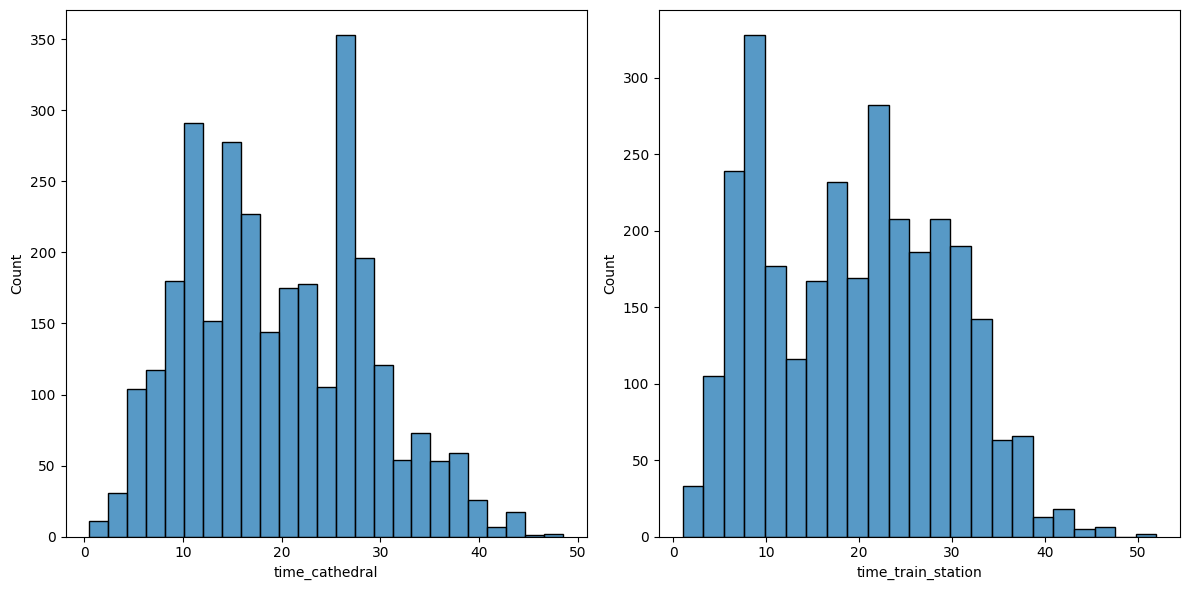

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(data=objects, x='time_cathedral', ax=axs[0])
sns.histplot(data=objects, x='time_train_station', ax=axs[1])

plt.tight_layout()
plt.show()

In [66]:
print(f'{round(objects['time_cathedral'].mean(), 2)}\n{round(objects['time_train_station'].mean(), 2)}')

19.7
19.53


The averages of the average time it takes to drive to the cathedral or train_station during peek hours in the morning (around 7:45) are about the same. Here, the distribution does not resemble the distance distributions as traffic congestion is taken into account.

### Crimes & Air polution

In [67]:
objects['crimes'].value_counts()

crimes
1.0     431
5.0     236
2.0     227
3.0     220
4.0     131
6.0      96
7.0      89
0.0      85
8.0      68
9.0      53
14.0     47
10.0     25
18.0     20
13.0     20
12.0     20
16.0     20
15.0     18
11.0     15
21.0      9
26.0      9
20.0      8
19.0      7
22.0      6
25.0      5
17.0      4
24.0      4
27.0      3
23.0      2
28.0      1
Name: count, dtype: int64

<Axes: xlabel='crimes', ylabel='Count'>

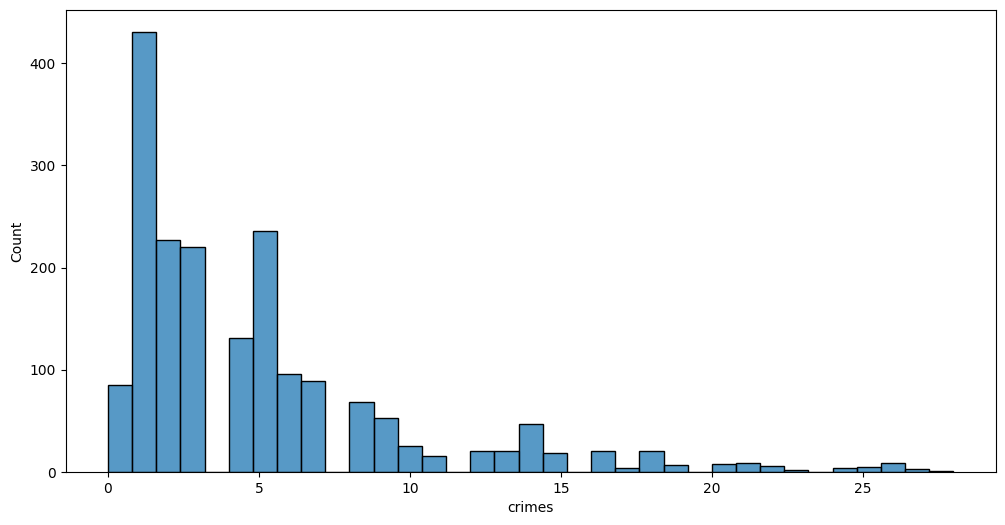

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

sns.histplot(data=objects, x='crimes')

Some listings do not display the number of crimes (in a 500 meter radius) over the past month. In most elderships the crime rate is very low.

<Axes: xlabel='no2', ylabel='Count'>

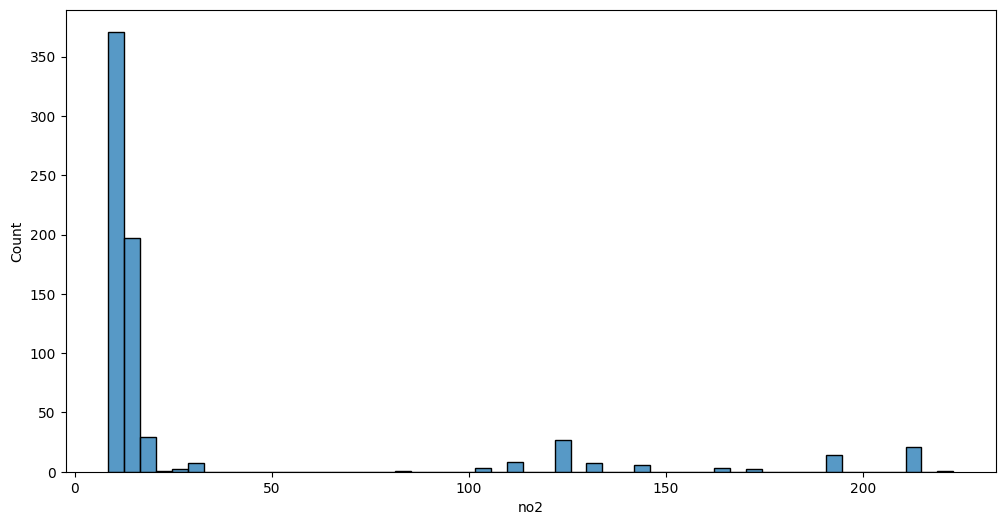

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

sns.histplot(data=objects, x='no2')

<Axes: xlabel='kd10', ylabel='Count'>

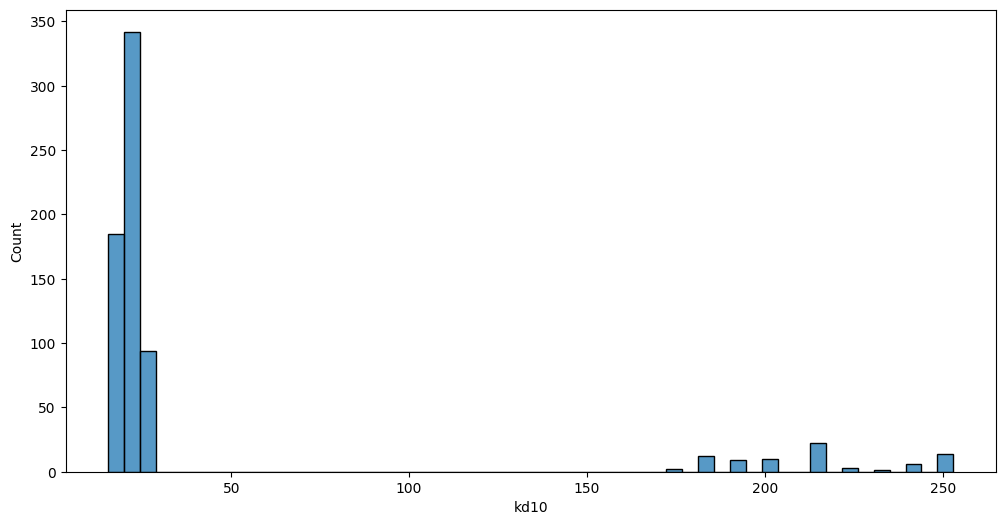

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

sns.histplot(data=objects, x='kd10')

Many listing have missing air polution data. The data shows that either the area has almost none or medium number of polutants in the air.

### Description

In [71]:
objects.loc[160, 'description']

'Parduodamas 2 kambarių butas naujai vystomame projekte "Virš šilų rytai".\n\nProjektas įsikurs Vito Lingio g. 8, Viršuliškėse, netoli miesto centro, tačiau tuo pačiu ramioje ir žalioje vietoje. Čia patogus susisiekimas tiek nuosavu automobiliu, tiek viešuoju transportu, šalia vakarinis aplinkkelis, Laisvės pr., Narbuto g., bei puikiai išvystyta dviračių infrastruktūra. Čia pat „Vilnius Outlet“ prekybos centras su pramogų erdvėmis, vaikų žaidimų zonomis, restoranais, sporto klubu ir kino erdve. Viskas, ko reikia patogiam gyvenimui, pasiekama ranka.\n\nProjekto privalumai:\n- A++ energinio naudingumo klasė\n- Individuali rekuperacinė vėdinimo sistema\n- Grindinis šildymas\n- Dideli langai\n- Moderni, šiuolaikiška architektūra\n- Aukšta statybų kokybė\n- Požeminė automobilių stovėjimo aikštelė\n- Dviračių ir paspirtukų saugykla su galimybe juos pasikrauti\n- Saulės energija bendrosioms pastatų erdvėms\n- Funkcionalūs išplanavimai\n- Uždara teritorija\n- Žaliosios zonos, vaikų žaidimų aik

The description column could be used to extract important information about the listing. We should apply NLP methodologies such as text vectorization that could be used to train the price prediction model.

In [ ]:
nlp = spacy.load("lt_core_news_lg")

def text_to_vector(text):
    doc = nlp(text)
    return doc.vector

description_vectors = [text_to_vector(str(text)) for text in objects['description']]